In [67]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score
from sklearn.metrics import ConfusionMatrixDisplay

In [95]:
games_df = pd.DataFrame()

games_df = pd.read_csv("C:/Users/Jude/Downloads/games_data.csv")

In [96]:
#check data
games_df.head()

,H_Team,A_Team,H_Score,A_Score,Home,Draw,Away,Results
0,CRY,FOR,5,0,1.87,3.55,4.22,1
1,EVE,NEW,1,2,2.70,3.29,2.64,1
2,NEW,FOR,3,2,1.57,4.08,5.86,1
3,LIV,WHU,1,0,1.67,3.77,5.33,1
4,BOU,CHE,2,3,6.12,4.13,1.55,1


In [70]:
games_df.dtypes
games_df = games_df.drop('Match Status', axis = 1)
games_df

,Hteam,Ateam,Hscore,Ascore,Home_Odds,Draw_Odds,Away_Odds,Sum_Odds,Score
0,7,9,5,0,1.28,5.26,12.50,19.04,1
1,8,16,1,2,1.28,5.26,12.50,19.04,0
2,16,9,3,2,1.28,5.26,12.50,19.04,1
3,12,17,1,1,1.28,5.26,12.50,19.04,0
4,13,19,1,0,1.28,5.26,12.50,19.04,1
...,...,...,...,...,...,...,...,...,...
20191,12,9,4,1,7.27,4.31,1.46,13.04,1
20192,3,13,1,3,7.27,4.31,1.46,13.04,0
20193,12,3,1,2,7.27,4.31,1.46,13.04,0
20194,18,2,0,1,7.27,4.31,1.46,13.04,0


In [85]:
#Extra space for exploration
#create inputs and targets
x = games_df.drop(['Score','Hscore','Ascore'], axis = 1)
y = games_df['Score']

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.5, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.577342
1    0.422658
Name: Score, dtype: float64
0    0.580016
1    0.419984
Name: Score, dtype: float64


,Hteam,Ateam,Home_Odds,Draw_Odds,Away_Odds,Sum_Odds
0,7,9,1.28,5.26,12.50,19.04
1,8,16,1.28,5.26,12.50,19.04
2,16,9,1.28,5.26,12.50,19.04
3,12,17,1.28,5.26,12.50,19.04
4,13,19,1.28,5.26,12.50,19.04
...,...,...,...,...,...,...
20191,12,9,7.27,4.31,1.46,13.04
20192,3,13,7.27,4.31,1.46,13.04
20193,12,3,7.27,4.31,1.46,13.04
20194,18,2,7.27,4.31,1.46,13.04


In [87]:
#build model
#intialize and train logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [92]:
#fit model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [93]:
#generate predictions
preds = logistic_model.predict(x_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
#get accuracy
logistic_model.score(x_test, y_test)

0.5785304020598139

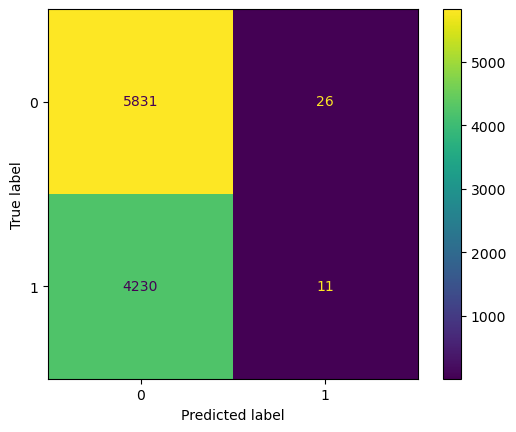

In [90]:
#plot confusion matrix
cm = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [91]:
#get precision
precision = precision_score(y_test, preds)
precision

0.2972972972972973

In [57]:
#get recall
recall = recall_score(y_test, preds)
recall

1.0

<Axes: >

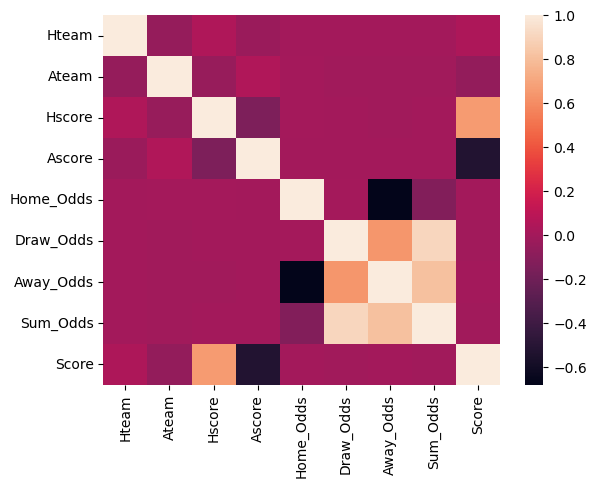

In [63]:
#data visualizations
games_df.corr()
sns.heatmap(games_df.corr())